# Q1
## a


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
data = pd.read_excel("2019 Winter Data Science Intern Challenge Data Set.xlsx")

Check the order amount information first.

In [ ]:
data.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

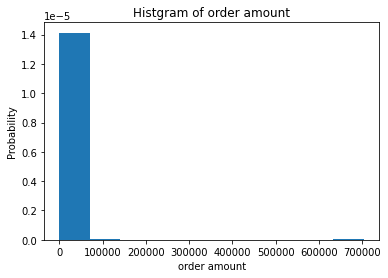

In [ ]:
plt.hist(data.order_amount,density=1)
plt.xlabel('order amount')
plt.ylabel('Probability')
plt.title('Histgram of order amount')
plt.show()

Since the standard deviation of the order amount is as high as \$41282 and 75% of the order amount is not greater than \$390, the AOV of \$3145.13 might be affected by the outliers like \$704000. 

Then check the total items to find the relationship between order amount and total items.

In [ ]:
data.total_items.describe()

count    5000.00000
mean        8.78720
std       116.32032
min         1.00000
25%         1.00000
50%         2.00000
75%         3.00000
max      2000.00000
Name: total_items, dtype: float64

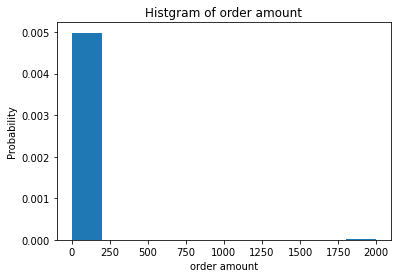

In [ ]:
plt.hist(data.total_items,density=1)
plt.xlabel('order amount')
plt.ylabel('Probability')
plt.title('Histgram of order amount')
plt.show()

The outliers of order amount like \$704000 could be result from large orders with 2000 items.

Plot the orders(total items, order amount) to find the distribution and outliers.

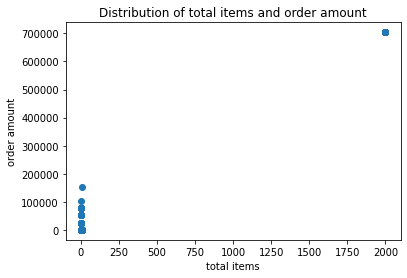

In [ ]:
plt.scatter(data.total_items, data.order_amount)
plt.xlabel('total items')
plt.ylabel('order amount')
plt.title("Distribution of total items and order amount")
plt.show()

According to the scatter plot of items and amount of each order, we can see that there are some orders with 2000 items and large amount, which made the AOV of \$3145.13 unreasonable.

In addition, for most orders with less items, we found two linear relationships between order amount and total items, the upper line represents expensive shoes that one item can cost over $20,000 and the lower line represents cheaper shoes that cost around hundreds dollars each item.


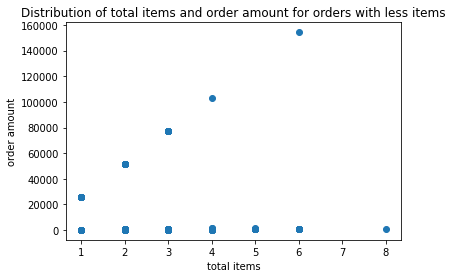

In [ ]:
plt.scatter(data[data.total_items<250].total_items, data[data.total_items<250].order_amount)
plt.xlabel('total items')
plt.ylabel('order amount')
plt.title("Distribution of total items and order amount for orders with less items")
plt.show()

All in all, the problem of the calculation of AOV of \$3145.13 is that there are two types of outliers in order amount distribution: orders with large amount of items and orders with expensive items. A better way to evaluate AOV is trimmed mean of order value that removes a small designated percentage of the largest and smallest values before calculating the mean, which helps eliminate the influence of outliers. For this data, the 10% trimmed mean of order value is \$287.39.

## b

The metric I would report for this dataset is central tendency (trimmed mean, median and mode), which can be used for analysis in together and help eliminate the influence of outliers.

## c

In [ ]:
from scipy import stats
stats.trim_mean(data.order_amount, 0.1)

287.39075

In [ ]:
data.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

In [ ]:
data.order_amount.mode()[0]

153

The value of 10% trimmed mean of order value is \$287.39, median is \$284 and mode is \$153.

# Q2

## a

SELECT COUNT(OrderID)

FROM Orders JOIN Shippers ON Orders.ShipperID = Shippers.ShipperID

WHERE Shippers.ShipperName = "Speedy Express";

**output:**

54

## b

SELECT Employees.LastName, COUNT(Orders.OrderID) AS OrderNum

FROM Orders JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID

GROUP BY Employees.LastName 

ORDER BY OrderNum DESC

LIMIT 1;

**output:**

Peacock.

## c

SELECT Products.ProductName, SUM(OrderDetails.Quantity) AS OrderQuantity

FROM Orders JOIN Customers ON Orders.CustomerID = Customers.CustomerID 

JOIN OrderDetails ON OrderDetails.OrderID = Orders.OrderID 

JOIN Products ON Products.ProductID = OrderDetails.ProductID 

WHERE Customers.Country = 'Germany'

GROUP BY OrderDetails.ProductID

ORDER BY OrderQuantity DESC

LIMIT 1;


**output:**

Boston Crab Meat.